STEP1:Data Loading and Cleaning


In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Retail_Sales_Data.csv')

print(data.head())
print(data.info())


    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [7]:

print(data.isnull().sum())


data = data.drop_duplicates()


data.columns = data.columns.str.strip().str.replace(' ', '_')

print("Data cleaned successfully!")


Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64
Data cleaned successfully!


STEP2:Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).

In [9]:
# Basic statistics for numerical columns
print(data.describe())

# Identify unique items in the "Item" column
unique_items = data['Item'].nunique()
print(f"Number of unique items: {unique_items}")

# Check the frequency of each category
print(data['Category'].value_counts())


          Calories  Calories_from_Fat   Total_Fat  Total_Fat_(%_Daily_Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated_Fat  Saturated_Fat_(%_Daily_Value)   Trans_Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

In [15]:


# Simulate weekly sales for each item over 52 weeks
weeks = 52
items = data['Item'].unique()

# Create a time-series dataset
time_data = pd.DataFrame({
    'Week': np.tile(np.arange(1, weeks + 1), len(items)),
    'Item': np.repeat(items, weeks),
    'Sales': np.random.randint(50, 500, len(items) * weeks),  # Random sales values
})

# Merge with original dataset for nutritional context
time_data = time_data.merge(data, on='Item')
print(time_data)


       Week                                              Item  Sales  \
0         1                                      Egg McMuffin    294   
1         2                                      Egg McMuffin    377   
2         3                                      Egg McMuffin    102   
3         4                                      Egg McMuffin    370   
4         5                                      Egg McMuffin    366   
...     ...                                               ...    ...   
13515    48  McFlurry with Reese's Peanut Butter Cups (Snack)    403   
13516    49  McFlurry with Reese's Peanut Butter Cups (Snack)    460   
13517    50  McFlurry with Reese's Peanut Butter Cups (Snack)    137   
13518    51  McFlurry with Reese's Peanut Butter Cups (Snack)    427   
13519    52  McFlurry with Reese's Peanut Butter Cups (Snack)    331   

                 Category    Serving_Size  Calories  Calories_from_Fat  \
0               Breakfast  4.8 oz (136 g)       300          

STEP3:Time Series AnalysiS

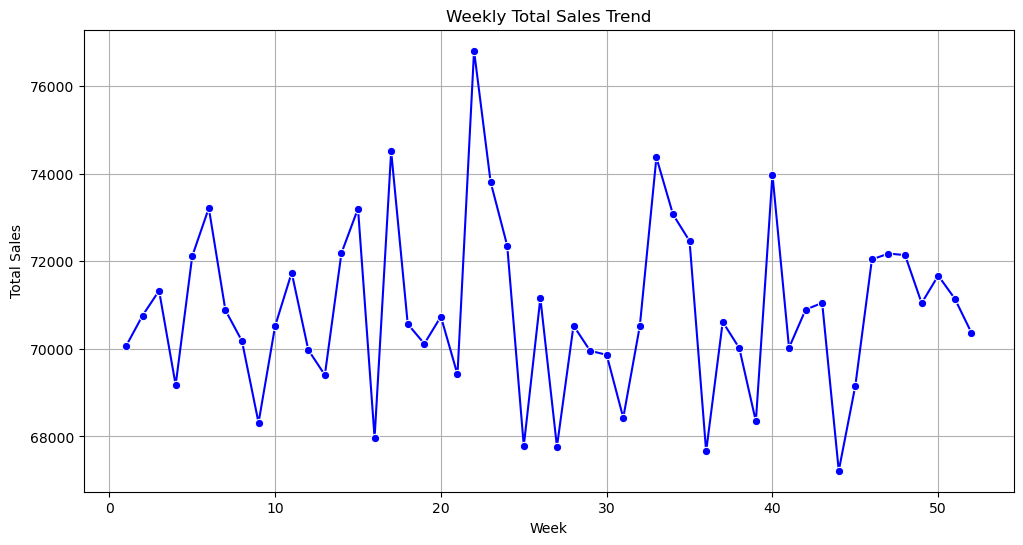

In [21]:
# Group sales by week
weekly_sales = time_data.groupby('Week')['Sales'].sum().reset_index()

# Line plot for sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='Sales', data=weekly_sales, marker='o', color='b')
plt.title('Weekly Total Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


STEP4:Customer and Product Analysis: Analyze calories demographics and category behavior.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21924\1788016643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=data, palette='viridis')


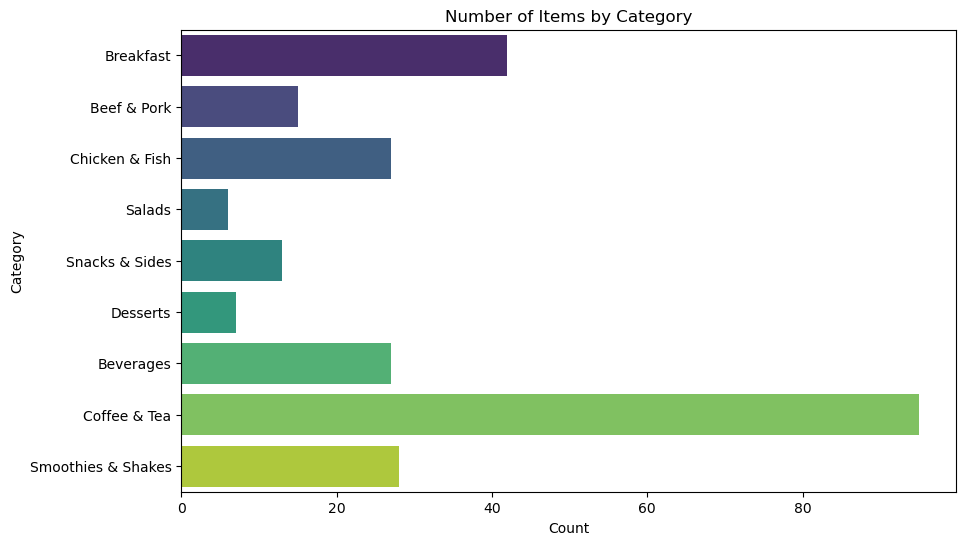

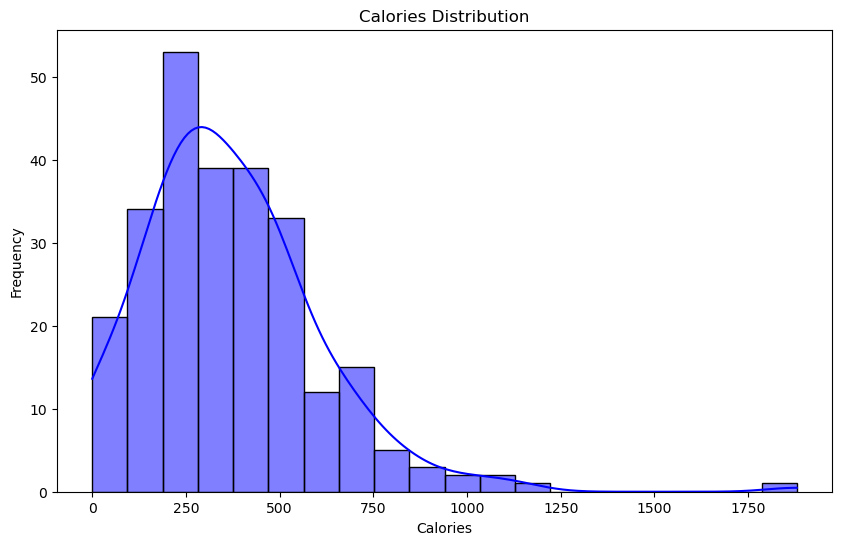

In [23]:

# Bar chart of items by category
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=data, palette='viridis')
plt.title('Number of Items by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Distribution of calories
plt.figure(figsize=(10, 6))
sns.histplot(data['Calories'], bins=20, kde=True, color='blue')
plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


STEP5:Visualization insights through HeatMap

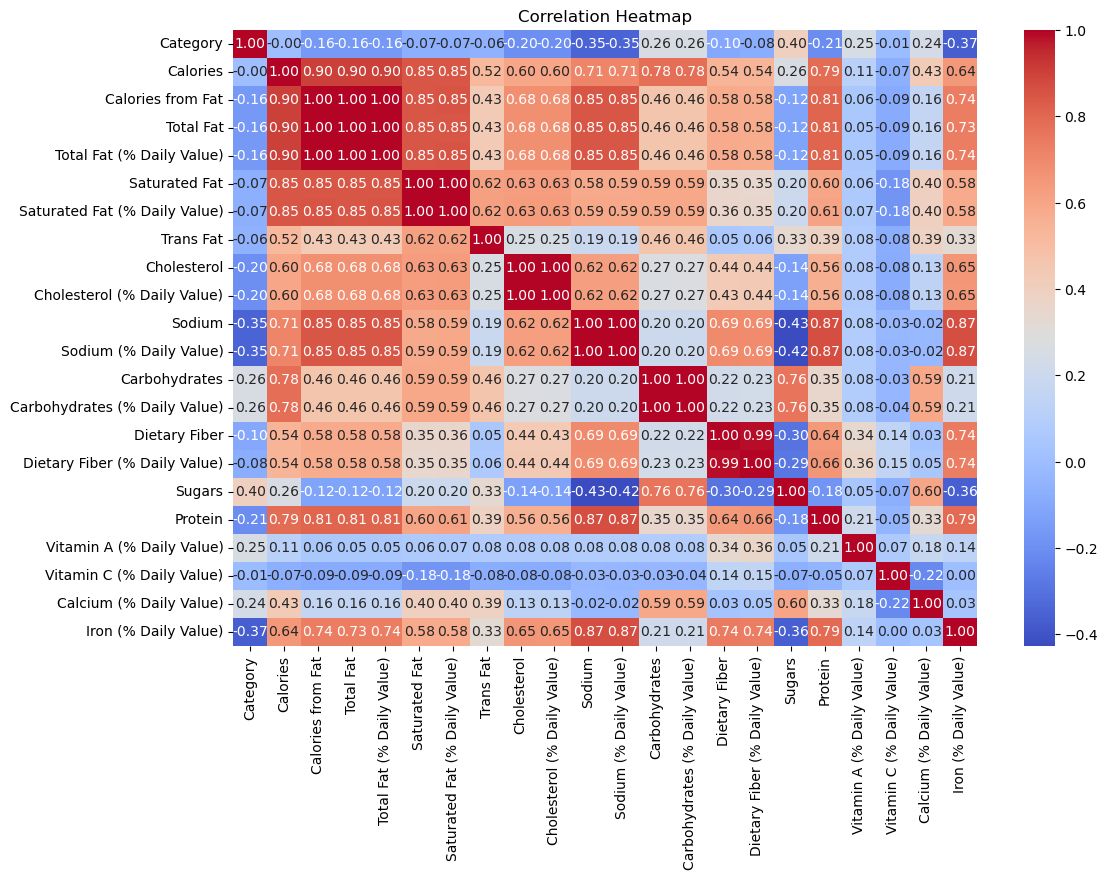

In [37]:
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


STEP6:Recommendations:
1. Top 5 High-Calorie Products
2. Top 5 High-Fat Products
3. Average Nutritional Content by Category

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21924\1329932911.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Calories', y='Item', data=top_calories, palette='viridis')


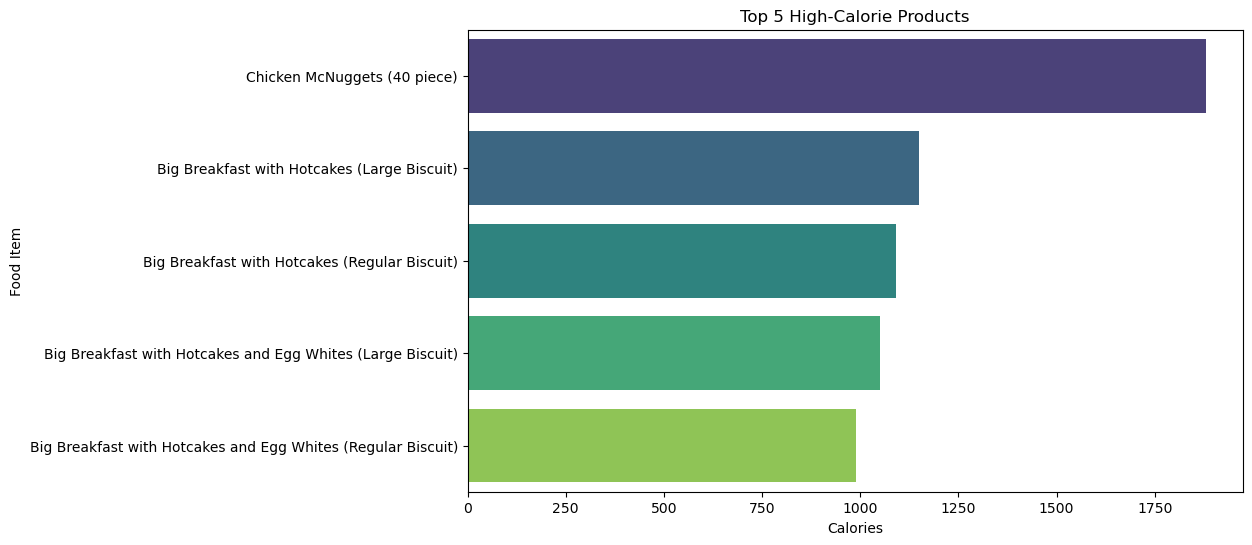

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21924\1329932911.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Fat', y='Item', data=top_fat, palette='coolwarm')


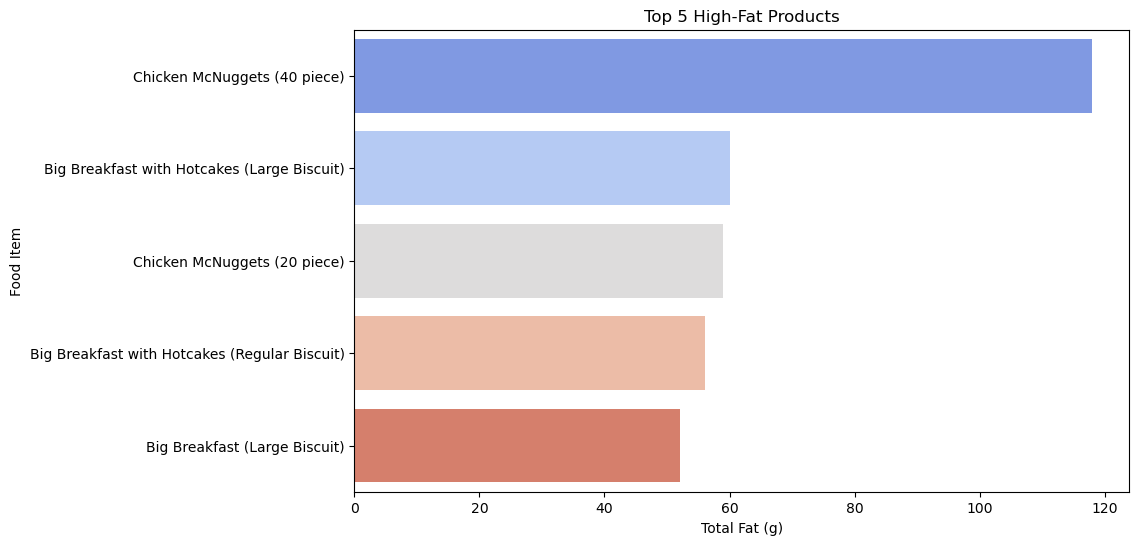

<Figure size 1200x800 with 0 Axes>

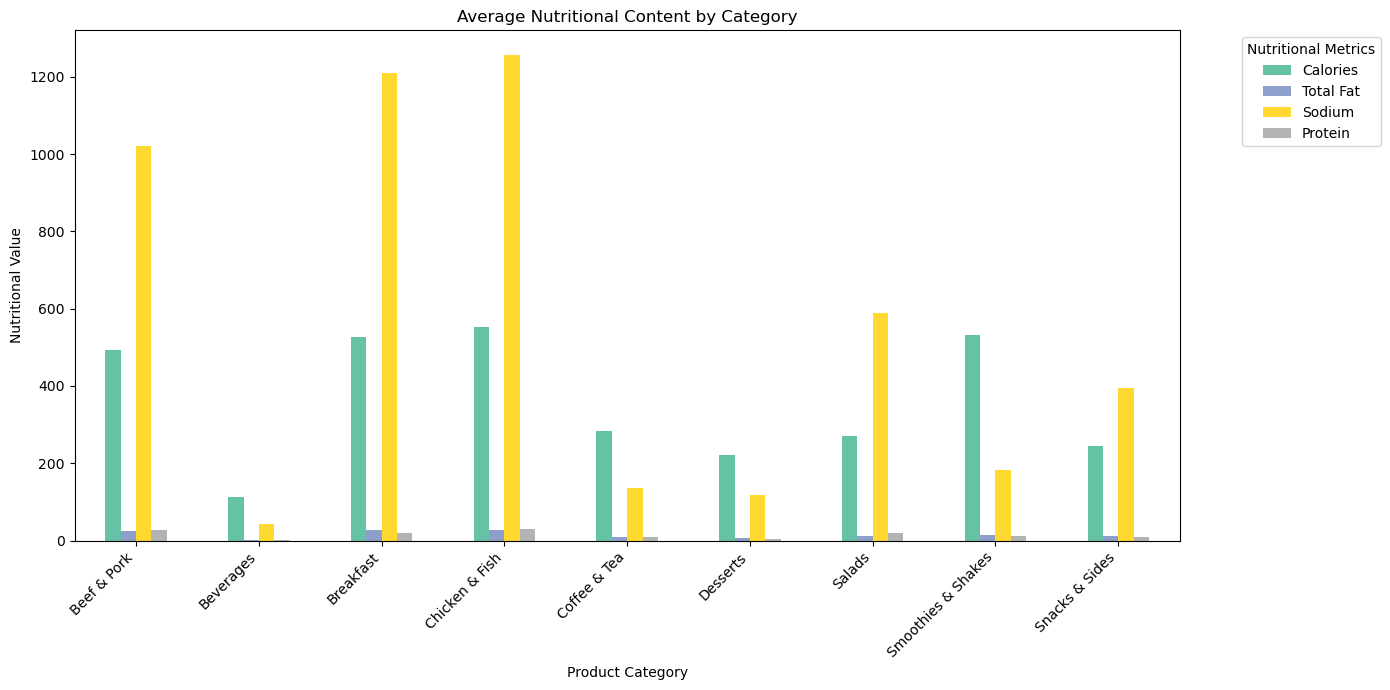

In [43]:


# Load the dataset
data = pd.read_csv('Retail_Sales_Data.csv')  

# 1. Top 5 High-Calorie Products
top_calories = data[['Item', 'Calories']].sort_values(by='Calories', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Calories', y='Item', data=top_calories, palette='viridis')
plt.title('Top 5 High-Calorie Products')
plt.xlabel('Calories')
plt.ylabel('Food Item')
plt.show()

# 2. Top 5 High-Fat Products
top_fat = data[['Item', 'Total Fat']].sort_values(by='Total Fat', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Fat', y='Item', data=top_fat, palette='coolwarm')
plt.title('Top 5 High-Fat Products')
plt.xlabel('Total Fat (g)')
plt.ylabel('Food Item')
plt.show()

# 3. Average Nutritional Content by Category
category_avg = data.groupby('Category')[['Calories', 'Total Fat', 'Sodium', 'Protein']].mean().reset_index()

plt.figure(figsize=(12, 8))
category_avg.plot(x='Category', kind='bar', stacked=False, figsize=(14, 7), colormap='Set2')
plt.title('Average Nutritional Content by Category')
plt.xlabel('Product Category')
plt.ylabel('Nutritional Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nutritional Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
